In [1]:
import math
import re
from collections import Counter
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
k1 = 1.5
b = 0.75

In [19]:
# Define the BM25 parameters and functions
def calculate_idf(corpus):
    idf = {}
    doc_count = len(corpus)
    
    for doc in corpus:
        term_freq = Counter(doc)
        for term, freq in term_freq.items():
            if term not in idf:
                doc_count_with_term = sum(1 for other_doc in corpus if term in other_doc)
                idf[term] = math.log((doc_count - doc_count_with_term + 0.5) /
                                    (doc_count_with_term + 0.5) + 1.0)
    return idf

def bm25_score(query, doc, idf, k1=1.5, b=0.75):
    score = 0
    doc_length = len(doc)
    term_freq = Counter(doc)
    
    for term in query:
        if term in idf:
            idf_value = idf[term]
            tf = term_freq[term]
            numerator = tf * (k1 + 1)
            denominator = tf + k1 * (1 - b + b * (doc_length / avg_doc_length))
            score += idf_value * (numerator / denominator)
    return score

def extract_keywords(documents):
    keywords_per_doc = []
    stop_words = set(stopwords.words('english'))
    for document in documents:
        document = preprocess_text(document)
        tokens = document.split()
        keywords = [token for token in tokens if token not in stop_words]
        keywords_per_doc.append(keywords)
    return keywords_per_doc

def extract_titles(documents):
    titles = []
    for document in documents:
        lines = document.split('\n')
        title = ""
        for line in lines:
            if line.startswith("Title:"):
                title = line.replace("Title:", "").strip()
                break
        titles.append(title)
    return titles

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9 ]', '', text)
    return text

In [20]:

# Load the documents and perform BM25 scoring
folder_path = "/Users/tanushree/downloads/Related"
documents = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            document_content = file.read()
            documents.append(document_content)

keywords_per_doc = extract_keywords(documents)
titles = extract_titles(documents)
avg_doc_length = sum(len(doc) for doc in keywords_per_doc) / len(keywords_per_doc)
idf = calculate_idf(keywords_per_doc)

query = input("Enter a query: ")
query = set(query.split())

doc_scores = [(title, bm25_score(query, keywords, idf)) for title, keywords in zip(titles, keywords_per_doc)]
doc_scores.sort(key=lambda x: -x[1])

top_20_doc_scores = doc_scores[:20]
for title, score in top_20_doc_scores:
    top_keywords = [word for word, _ in Counter(keywords_per_doc[titles.index(title)]).most_common(10)]
    print(f"Title: {title} - BM25 Score: {score:.2f}")
    print("Keywords =", top_keywords)
    print("-----------------")


Title: Liquid and Thin-Layer Chromatography - BM25 Score: 1.90
Keywords = ['chromatography', 'liquid', 'thinlayer', 'used', 'variety', 'chromatographic', 'configurations', 'classical', 'techniques', 'highperformance']
-----------------
Title: Retention correlation and orthogonality between reversed phase countercurrent chromatography and liquid chromatography based on solvent strength - BM25 Score: 1.87
Keywords = ['chromatography', 'countercurrent', 'liquid', 'orthogonality', 'phase', 'solvent', 'retention', 'correlation', 'reversed', 'five']
-----------------
Title: Chapter 24 Application of enantioselective liquid chromatography - BM25 Score: 1.87
Keywords = ['liquid', 'enantioselective', 'chapter', 'chromatography', 'preparativescale', 'applications', 'analysis', 'title', '24', 'application']
-----------------
Title: Liquid Chromatography - BM25 Score: 1.79
Keywords = ['liquid', 'chromatography', 'employed', 'separation', 'dairy', 'main', 'milk', 'title', 'chromatographyabstract', 

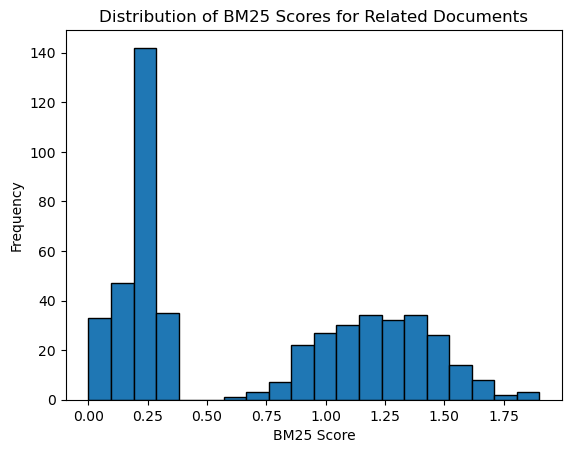

In [26]:
scores = [score for _, score in doc_scores]
plt.hist(scores, bins=20, edgecolor='k')
plt.xlabel('BM25 Score')
plt.ylabel('Frequency')
plt.title('Distribution of BM25 Scores for Related Documents')
plt.show()

In [23]:

folder_path = "/Users/tanushree/downloads/Non-Related"
documents_2 = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            document_content = file.read()
            documents_2.append(document_content)

keywords_per_doc_2 = extract_keywords(documents_2)
titles_2 = extract_titles(documents_2)
avg_doc_length_2 = sum(len(doc) for doc in keywords_per_doc) / len(keywords_per_doc)
idf_2 = calculate_idf(keywords_per_doc)

query = input("Enter a query: ")
query = set(query.split())

doc_scores_2 = [(title, bm25_score(query, keywords, idf)) for title, keywords in zip(titles_2, keywords_per_doc_2)]
doc_scores_2.sort(key=lambda x: -x[1])

top_20_doc_scores_2 = doc_scores_2[:20]
for title, score in top_20_doc_scores_2:
    top_keywords_2 = [word for word, _ in Counter(keywords_per_doc_2[titles_2.index(title)]).most_common(10)]
    print(f"Title: {title} - BM25 Score: {score:.2f}")
    print("Keywords =", top_keywords_2)
    print("-----------------")


Title: Hydrophilic interaction liquid chromatography promotes the development of bio-separation and bio-analytical chemistry - BM25 Score: 1.35
Keywords = ['hydrophilic', 'hilic', 'bioseparation', 'separation', 'interaction', 'liquid', 'chromatography', 'development', 'bioanalytical', 'lc']
-----------------
Title: Cloud chemistry on Venus: Sulfuric acid reactions and supercooling in Venus liquid cloud droplets - BM25 Score: 1.15
Keywords = ['cloud', 'venus', 'acid', 'hcl', 'sulfuric', 'droplets', 'solutions', 'reactions', 'liquid', 'chemistry']
-----------------
Title: Application status and prospect of ionic liquids in oilfield chemistry - BM25 Score: 1.01
Keywords = ['ionic', 'liquids', 'oilfield', 'oil', 'application', 'chemistry', 'inhibit', 'forming', 'liquid', 'surface']
-----------------
Title: Naphthalene-2,3-dicarboxaldehyde as a pulsed-post column derivatization reagent; comparison with two alternative o-phthalaldehyde based chemistries for the determination of histamine - B

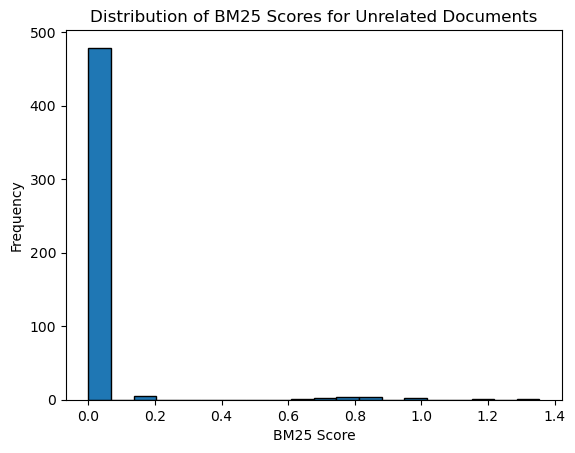

In [27]:
scores_2 = [score for _, score in doc_scores_2]
plt.hist(scores_2, bins=20, edgecolor='k')
plt.xlabel('BM25 Score')
plt.ylabel('Frequency')
plt.title('Distribution of BM25 Scores for Unrelated Documents')
plt.show()

In [25]:

related_scores = [score for _, score in doc_scores]
unrelated_scores = [score for _, score in doc_scores_2]

t_stat, p_value = stats.ttest_ind(related_scores, unrelated_scores)

# Print the results
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between related and unrelated documents.")
else:
    print("There is no significant difference between related and unrelated documents.")

t-statistic: 26.725334434302066
P-value: 4.3172769216580326e-119
There is a significant difference between related and unrelated documents.
